In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("Sales.csv")
df.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


In [4]:
# Do zbadania:
#1 która marka sprzedała najwięcej telefonów
#2 jak rozkładała się sprzedaż modeli w obrębie danej marki
#3 ile dana marka zarobiła łącznie
#4 ile dana marka zarobiła na poszczególnych modelach
#5 ile dana marka przyznała łącznie rabatu
#6 ile dana marka przyznała rabatu na poszczególnych modelach
#7 ile dana marka średnio zarobiła na danych modelach
#8 ile dana marka średnio przyznała rabatu na poszczególnych modelach
#9 jaka była średnia ceny sprzedaży telefonu w obrębie danej marki
#10 jaka była mediana ceny sprzedaży telefonu w obrębie danej marki
#11 dystrybucja telefonów dla poszczególnych rozmiarów pamięci 
#12 korelacja między rozmiarem pamięci a kosztem telefonu

In [5]:
#1 która marka sprzedała najwięcej telefonów

In [6]:
df.value_counts("Brands")

Brands
SAMSUNG         719
Apple           387
realme          327
OPPO            260
Nokia           213
Xiaomi          198
Infinix         151
GIONEE          129
vivo            124
Lenovo          121
ASUS            118
Motorola        105
LG               99
POCO             74
HTC              55
Google Pixel     29
IQOO              5
Name: count, dtype: int64

In [7]:
#2 jak rozkładała się sprzedaż modeli w obrębie danej marki

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
Samsung = df.loc[(df["Brands"] == "SAMSUNG")]
Samsung[["Brands", "Models"][0:]].value_counts()

Brands   Models                                  
SAMSUNG  Galaxy A12                                  19
         Galaxy Note 5                               10
         Galaxy A21s                                  9
         Galaxy S9 Plus                               9
         Metro 313                                    9
         Galaxy A52                                   9
         Galaxy A7                                    8
         Galaxy M02                                   8
         Galaxy A72                                   8
         Galaxy A22 5G                                8
         Galaxy A10s                                  7
         Galaxy M11                                   7
         Galaxy M30s                                  7
         Galaxy S9                                    7
         Galaxy Note 9                                7
         Galaxy A51                                   7
         Galaxy S6 Edge                               

In [10]:
Apple = df.loc[df["Brands"] == "Apple"]
Apple[["Brands", "Models"][0:]].value_counts()

Brands  Models            
Apple   iPhone 11             36
        iPhone XR             27
        iPhone 7              22
        iPhone 11 Pro         21
        iPhone 7 Plus         20
        iPhone 13 Pro Max     19
        iPhone 12 Mini        18
        iPhone 6s             18
        iPhone 13 Pro Max     18
        iPhone 12             18
        iPhone SE             17
        iPhone 6s Plus        16
        iPhone 13 Mini        14
        iPhone 11 Pro Max     13
        iPhone XS             13
        iPhone 6              12
        iPhone 12 Pro Max     12
        iPhone 13 Pro         12
        iPhone 12 Pro         11
        iPhone XS Max         10
        iPhone 8 Plus          9
        iPhone 13              9
        iPhone 6 Plus          8
        iPhone 8               6
        iPhone X               4
        iPhone 13 mini         2
        iPhone 13 Pro          1
        iPhone 6s              1
Name: count, dtype: int64

In [11]:
# Analogicznie dla pozostałych marek ...

In [12]:
# Scalone dane

In [13]:
df["Licznik"] = 0
df.groupby(["Brands", "Models"]).count()["Licznik"]

Brands        Models                                  
ASUS          6Z                                           7
              ROG                                          1
              ROG 5s                                       4
              ROG 5s Pro                                   1
              ROG Phone 3                                  3
              ROG Phone 5                                  4
              ROG Phone 5 Pro                              1
              ROG Phone 5 Ultimate                         1
              ROG Phone II                                 2
              ZenFone 5Z                                   5
              ZenFone Lite L1                              2
              ZenFone Max M1                               3
              ZenFone Max M2                               6
              ZenFone Max Pro M2                           6
              Zenfone 2 Laser ZE500KL                      1
              Zenfone 4 Selfie

In [14]:
#3 ile dana marka zarobiła łącznie

In [15]:
Przychody_marek = df.groupby("Brands")["Selling Price"].sum()
Przychody_marek = Przychody_marek.sort_values(ascending = False)
Przychody_marek

Brands
Apple           31728412
SAMSUNG         17469003
realme           5361667
OPPO             4825727
Xiaomi           3354498
vivo             2959414
ASUS             2398576
Nokia            2008304
LG               1912995
Google Pixel     1780364
Motorola         1717534
Infinix          1674919
HTC              1557291
POCO             1248426
Lenovo           1220145
GIONEE            920427
IQOO              185950
Name: Selling Price, dtype: int64

In [16]:
#4 ile dana marka zarobiła na poszczególnych modelach

In [17]:
Przychod_modele = df.groupby(["Brands", "Models"])["Selling Price"].sum()
Przychod_modele

Brands        Models                                  
ASUS          6Z                                           281993
              ROG                                           26499
              ROG 5s                                       215996
              ROG 5s Pro                                    79999
              ROG Phone 3                                  154997
              ROG Phone 5                                  215996
              ROG Phone 5 Pro                               69999
              ROG Phone 5 Ultimate                          79999
              ROG Phone II                                 103998
              ZenFone 5Z                                   193595
              ZenFone Lite L1                               14398
              ZenFone Max M1                                28797
              ZenFone Max M2                                83994
              ZenFone Max Pro M2                           107994
              Zenfone

In [18]:
#5 ile dana marka przyznała łącznie rabatu

In [19]:
Rabaty_lacznie = df.groupby(["Brands"])["Discount"].sum()
Rabaty_lacznie = Rabaty_lacznie.sort_values(ascending = False)
Rabaty_lacznie

Brands
SAMSUNG         1823227
Apple           1134611
OPPO             533202
realme           471403
Motorola         454009
LG               301415
vivo             210386
POCO             193500
Xiaomi           180446
Nokia            158841
ASUS             148500
Infinix          139812
GIONEE            88174
Lenovo            32267
IQOO              19000
Google Pixel      17990
HTC                   0
Name: Discount, dtype: int64

In [20]:
#6 ile dana marka przyznała rabatu na poszczególnych modelach

In [21]:
Rabaty_modele = df.groupby(["Brands", "Models"])["Discount"].sum()
Rabaty_modele

Brands        Models                                  
ASUS          6Z                                               0
              ROG                                          57500
              ROG 5s                                       24000
              ROG 5s Pro                                    6000
              ROG Phone 3                                  25000
              ROG Phone 5                                  24000
              ROG Phone 5 Pro                               6000
              ROG Phone 5 Ultimate                          6000
              ROG Phone II                                     0
              ZenFone 5Z                                       0
              ZenFone Lite L1                                  0
              ZenFone Max M1                                   0
              ZenFone Max M2                                   0
              ZenFone Max Pro M2                               0
              Zenfone 2 Laser ZE500

In [22]:
#7 ile dana marka średnio zarobiła na danych modelach

In [23]:
sredni_przychod_modele = (df.groupby(["Brands", "Models"])["Selling Price"].mean()).round(2)
sredni_przychod_modele

Brands        Models                                  
ASUS          6Z                                           40284.71
              ROG                                          26499.00
              ROG 5s                                       53999.00
              ROG 5s Pro                                   79999.00
              ROG Phone 3                                  51665.67
              ROG Phone 5                                  53999.00
              ROG Phone 5 Pro                              69999.00
              ROG Phone 5 Ultimate                         79999.00
              ROG Phone II                                 51999.00
              ZenFone 5Z                                   38719.00
              ZenFone Lite L1                               7199.00
              ZenFone Max M1                                9599.00
              ZenFone Max M2                               13999.00
              ZenFone Max Pro M2                           17

In [24]:
#8 ile dana marka średnio przyznała rabatu na poszczególnych modelach

In [25]:
sredni_rabat_modele = (df.groupby(["Brands", "Models"])["Discount"].mean()).round(2)
sredni_rabat_modele

Brands        Models                                  
ASUS          6Z                                              0.00
              ROG                                         57500.00
              ROG 5s                                       6000.00
              ROG 5s Pro                                   6000.00
              ROG Phone 3                                  8333.33
              ROG Phone 5                                  6000.00
              ROG Phone 5 Pro                              6000.00
              ROG Phone 5 Ultimate                         6000.00
              ROG Phone II                                    0.00
              ZenFone 5Z                                      0.00
              ZenFone Lite L1                                 0.00
              ZenFone Max M1                                  0.00
              ZenFone Max M2                                  0.00
              ZenFone Max Pro M2                              0.00
       

In [26]:
#9 jaka była średnia ceny sprzedaży telefonu w obrębie danej marki
#10 jaka była mediana ceny sprzedaży telefonu w obrębie danej marki

In [27]:
zestawienie_marek = df.groupby(["Brands"])["Discount"].sum()

zestawienie_marek = zestawienie_marek.reset_index()

zestawienie_marek.rename(columns={"Brands" : "Marki"}, inplace = True)
zestawienie_marek.rename(columns={"Discount" : "Rabaty_suma"}, inplace = True)

zestawienie_marek["Przychód_suma"] = zestawienie_marek["Marki"].map(Przychody_marek)

srednia_sprzedazy_marek = (df.groupby(["Brands"])["Selling Price"].mean()).round(2)
zestawienie_marek["Przychód_średnia"] = zestawienie_marek["Marki"].map(srednia_sprzedazy_marek)

mediana_sprzedazy_marek = df.groupby(["Brands"])["Selling Price"].median()
zestawienie_marek["Przychód_mediana"] = zestawienie_marek["Marki"].map(mediana_sprzedazy_marek)

zestawienie_marek["Rabat_suma"] = zestawienie_marek["Rabaty_suma"]
zestawienie_marek = zestawienie_marek.drop(columns = ["Rabaty_suma"])
zestawienie_marek.rename(columns = {"Rabat_suma" : "Rabaty_suma"}, inplace = True)

srednia_rabatow_marek = (df.groupby(["Brands"])["Discount"].mean()).round(2)
zestawienie_marek["Rabaty_średnia"] = zestawienie_marek["Marki"].map(srednia_rabatow_marek)
mediana_rabatow_marek = df.groupby(["Brands"])["Discount"].median()
zestawienie_marek["Rabaty_mediana"] = zestawienie_marek["Marki"].map(mediana_rabatow_marek)

zestawienie_marek
zestawienie_marek.to_csv("tabela.csv")

In [28]:
#11 dystrybucja telefonów dla poszczególnych rozmiarów pamięci 

dystrybucja = df.groupby(["Storage", "Brands"]).count()
dystrybucja = dystrybucja.reset_index()
dystrybucja.head(5)


,Storage,Brands,Models,Colors,Memory,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Licznik
0,1 TB,Apple,13,13,13,13,5,13,13,13,13,13,13
1,1 TB,SAMSUNG,1,1,1,1,1,1,1,1,1,1,1
2,10 MB,Nokia,1,1,1,1,1,1,1,1,1,1,1
3,100 MB,SAMSUNG,2,2,2,2,2,2,2,2,2,2,2
4,128 GB,ASUS,13,13,13,13,11,13,13,13,13,13,13


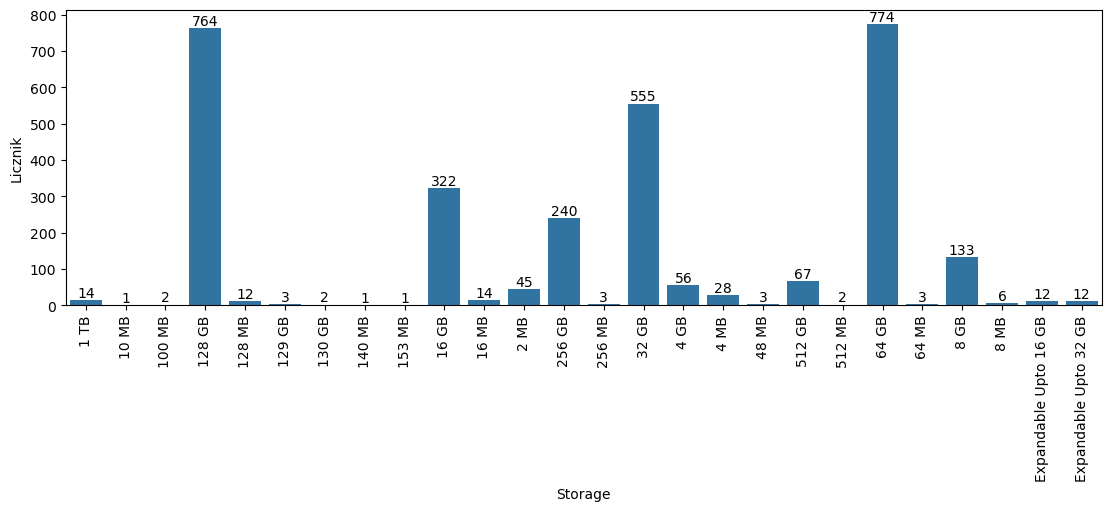

In [36]:
dystrybucja2 = dystrybucja.groupby("Storage").sum(numeric_only = True)
dystrybucja2 = dystrybucja2.reset_index()

# zmiana logiki przy tworzeniu wykresów, poprzednio, nie zapisywały się podczas zapisywania do pliku PDF
plt.figure(layout = "constrained", figsize = (11,5))
dystrybucja_wykres = sns.barplot(x = "Storage", y = "Licznik", data = dystrybucja2)
for container in dystrybucja_wykres.containers:
    dystrybucja_wykres.bar_label(container, fmt='%.0f')
plt.xticks(rotation=90)
#plt.savefig("wykres3.pdf", format="pdf")
dystrybucja_wykres.figure

In [30]:
#12 korelacja między rozmiarem pamięci a kosztem telefonu


In [31]:
df2 = df
df2.head(5)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Licznik
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,0
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000,0
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563,0
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000,0
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000,0


In [32]:
df2.sort_values("Storage")
df2

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Licznik
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,0
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000,0
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563,0
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000,0
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000,0
5,GIONEE,L800,Black,8 MB,16 MB,Yes,4.0,2199,2199,GIONEE L800,0,0.000000,0
6,Apple,iPhone 13 Mini,Pink,6 GB,512 GB,Yes,NaN,99900,99900,Apple iPhone 13 Mini,0,0.000000,0
7,Apple,iPhone XR,Coral,3 GB,64 GB,Yes,4.6,42999,47900,Apple iPhone XR,4901,10.231733,0
8,SAMSUNG,Galaxy E5,Brown,1.5 GB,16 GB,Yes,4.2,20400,20400,SAMSUNG Galaxy E5,0,0.000000,0
9,Xiaomi,Redmi Note 11T 5G,Aquamarine Blue,8 GB,128 GB,Yes,4.3,21736,22999,Xiaomi Redmi Note 11T 5G,1263,5.491543,0


In [33]:
def konwersja_na_GB(pamiec):
    if not isinstance(pamiec, str):
        return None

    pamiec = pamiec.strip().upper()

    if "Expandable" in pamiec or not any(wartosc in pamiec for wartosc in ['MB', 'GB', 'TB']):
            return None

    try:
        if 'TB' in pamiec:
            return float(pamiec.replace('TB', '').strip()) * 1024
        elif 'GB' in pamiec:
            return float(pamiec.replace('GB', '').strip())
        elif 'MB' in pamiec:
            return float(pamiec.replace('MB', '').strip()) / 1024
    except ValueError:
        return None

df2["Storage_GB"] = df2["Storage"].apply(konwersja_na_GB)
df2.head(5)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Licznik,Storage_GB
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,0,128.0
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000,0,16.0
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563,0,NaN
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000,0,64.0
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000,0,64.0


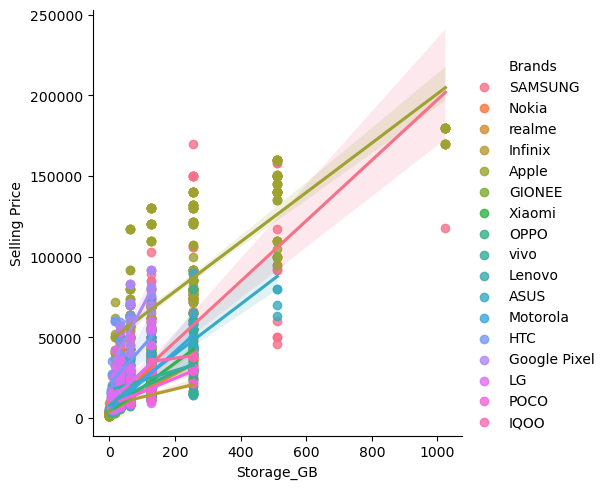

In [34]:
plt.close()
kor_pamiec_cena = sns.lmplot(x = "Storage_GB", y = "Selling Price", hue = "Brands", data = df2)
kor_pamiec_cena.figure

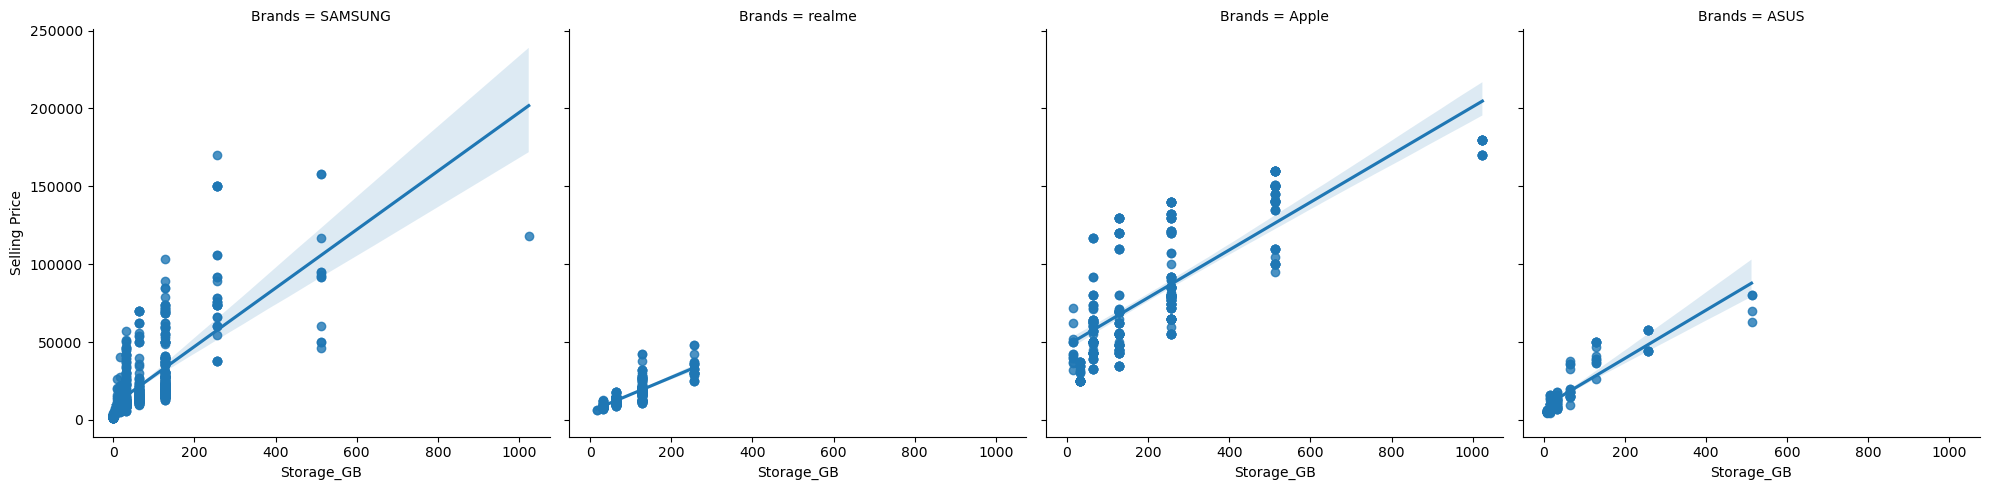

In [35]:
df_selekcja = df2.loc[(df2["Brands"] == "Apple") | (df2["Brands"] == "SAMSUNG") | (df2["Brands"] == "realme") | (df2["Brands"] == "ASUS")]
df_selekcja

kor_pamiec_cena_selekcja = sns.lmplot(x = "Storage_GB", y = "Selling Price", col = "Brands", data = df_selekcja)
kor_pamiec_cena_selekcja.figure